### 以下のベータ分布をギブスサンプリングで求める．

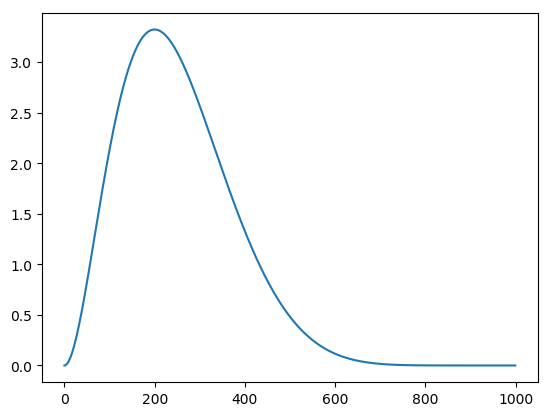

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] pdf(::Distributions.Beta{Float64}, ::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:522
 [4] include_string(::Module, ::String, ::String) at /Users/noriakioshita/.julia/v0.6/Compat/src/Compat.jl:71
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/noriakioshita/.julia/v0.6/IJulia/src/execute_request.jl:158
 [6] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /Users/noriakioshita/.julia/v0.6/Compat/src/Compat.jl:385
 [7] eventloop(::ZMQ.Socket) at /Users/noriakioshita/.julia/v0.6/IJulia/src/eventloop.jl:8
 [8] (::IJulia.##14#17)() at ./task.jl:335
while loading In[1], in expression starting on line 6


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x127c0ceb8>

In [1]:
using Distributions
using PyPlot

x = linspace(0, 1, 1000)
beta = Beta(3,9)
plot(pdf(beta,x))

In [2]:
srand(12345)
ims = []
b = 0.8 # 相関項(Correlation term)
x = 10.0
y = 3.0
times = 300
local ims = Float64[]

for i = 1:times
    u1 = rand()
    u2 = rand()
    x_old = x
    x = pdf(beta,x) + b*y
    push!(ims, ([x_old, x], [y, y])) # 表示せずに配列imsに保存
    y_old = y
    y = pdf(beta,x) + b*x
    push!(ims, ([x, x], [y_old, y])) # 表示せずに配列imsに保存
end

ims

600-element Array{Any,1}:
 ([10.0, 2.4], [3.0, 3.0])                   
 ([2.4, 2.4], [3.0, 1.92])                   
 ([2.4, 1.536], [1.92, 1.92])                
 ([1.536, 1.536], [1.92, 1.2288])            
 ([1.536, 0.98304], [1.2288, 1.2288])        
 ([0.98304, 0.98304], [1.2288, 0.786432])    
 ([0.98304, 0.629146], [0.786432, 0.786432]) 
 ([0.629146, 0.629146], [0.786432, 0.573419])
 ([0.629146, 0.528838], [0.573419, 0.573419])
 ([0.528838, 0.528838], [0.573419, 0.759281])
 ([0.528838, 0.943636], [0.759281, 0.759281])
 ([0.943636, 0.943636], [0.759281, 0.754909])
 ([0.943636, 0.603927], [0.754909, 0.754909])
 ⋮                                           
 ([0.509213, 1.10361], [0.839433, 0.839433]) 
 ([1.10361, 1.10361], [0.839433, 0.882887])  
 ([1.10361, 0.706309], [0.882887, 0.882887]) 
 ([0.706309, 0.706309], [0.882887, 0.578716])
 ([0.706309, 0.476641], [0.578716, 0.578716])
 ([0.476641, 0.476641], [0.578716, 1.01429]) 
 ([0.476641, 1.4444], [1.01429, 1.01429])    
 ([1.444

以下のgifにするコードは黒木玄さんに書いてもらったものをそのまま代用．

In [ ]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

########## display file
function displayfile(mimetype, filename)
    open(filename) do f
        base64text = base64encode(f)
        display("text/html", """<img src="data:$mimetype;base64,$base64text">""")
    end
end

########## initialize the frame
xs = [ims[i][j][1] for j in 1:2, i in 1:length(ims)]
ys = [ims[i][j][2] for j in 1:2, i in 1:length(ims)]
xmin, xmax = minimum(xs)-0.5, maximum(xs)+0.5
ymin, ymax = minimum(ys)-0.5, maximum(ys)+0.5
function initframe()
    xlim(xmin, xmax)
    ylim(ymin, ymax)
    grid(ls=":")
end

########## update the frame
function updateframe(t)
    # clf() #←全部消して書き直す場合にはコメントを外す
    #---------- フレームのアップデート開始
    if t ≥ 1
        X, Y = ims[t]
        plot(X, Y, lw=1.0)
    end
    title("t = $t")
    #---------- フレームのアップデート終了
    # plot() #←念のためのおまじない. []と書いてもよい. いらない場合も多い.
end

########## filename
filename = "gibbs_sampling.gif"

######### Construct Figure and Plot Data
fig = figure(figsize=(6.4, 4.8))

# Create the animation object by anim.FuncAnimaton
frames = collect(0:length(ims))
@time myanim = anim.FuncAnimation(fig, updateframe, init_func=initframe, frames=frames, interval=100)

# Convert it to an animated GIF file by Imagemagick.
@time myanim[:save](filename, writer="imagemagick")

sleep(0.1)

# Display the movie.
displayfile("image/gif", filename)

# Don't display the axes of figure().
clf()